# Описание проекта
Система, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением
транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна
оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

## Идея решения:

1. Создать модель предсказания ДТП (целевое значение — **at_fault (виновник)** в таблице **parties)**
    - Для модели выбрать тип виновника — только машина (**car**).
    - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
    - Для моделирования ограничиться данными за 2012 год — они самые свежие.
    - Обязательное условие — учесть фактор возраста автомобиля.
2. На основе модели исследовать основные факторы ДТП.
3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
    - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    - Какие ещё факторы нужно учесть?
    - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

### Последовательность действий

#### **Шаг 1. Загрузим таблицы SQL**

Подключимся к базе данных и загрузим таблицы в pandas DataFrame. Для этого используем библиотеку sqlalchemy.

#### **Шаг 2. Проведем первичное исследование таблиц**

- Все ли таблицы имеют набор данных;
- Соответствует ли количество таблиц условию задачи;
- Имеется ли общий ключ для связи таблиц.

#### **Шаг 3. Проведем статистический анализ факторов ДТП**

1. Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем весь период наблюдений (таблица **collisions)**.
    - Создадим sql-запрос;
    - Построим график;
    - Сделаем вывод.
2. Скоро состоится первое совещание рабочей группы. Чтобы обсуждение было конструктивным, каждый сотрудник должен понимать данные. Для этого мы должны создать подходящие аналитические задачи и поручить их решение коллегам. Примеры задач:
    - Проведите анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать **collisions** и **parties**);
    - Найдите самые частые причины ДТП (таблица **parties**).

3. Создадим не менее шести задач для коллег. Будем опираться на примеры и таблицы.

4. Пропишем порядок решения для двух задач из списка. Реализуем его. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка:

- Создадим sql-запрос;
- Построим график;
- Сделаем вывод.

#### **Шаг 4. Создадим модель для оценки водительского риска**

1. Подготовим набор данных на основе первичного предположения заказчика:

    - Выберем тип виновника — только машина (**car**).
    - Возьмем случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
    - Для моделирования возьмем данные только за 2012 год.
    - Подготовка исходной таблицы должна проводиться с помощью sql-запроса.

2. Проведем первичный отбор факторов, необходимых для модели. Изучим описание факторов. Нужно отобрать те, которые могут влиять на вероятность ДТП. Аргументируем свой выбор. Например, состояние водителя до начала поездки (трезвость или приём лекарств) не измеряется и не может быть использовано в модели.

3. Проведем статистическое исследование отобранных факторов.
    - По результату исследовательского анализа внесем корректировки, если они нужны. Сделаем вывод.
    - Если необходимо, категоризируем исходные данные, проведем масштабирование.
    - Подготовим обучающую и тестовую выборки.

#### **Шаг 5. Найдем лучшую модель**

1. Смоделируем не менее 3-х типов моделей с перебором гиперпараметров.
2. Выберем метрику для оценки модели, исходя из поставленной бизнесом задачи.
3. Оформим вывод в виде сравнительной таблицы.

#### Шаг 6. Проверим лучшую модель в работе

1. Проведем графический анализ «Матрица ошибок». Выведем полноту и точность на график.
2. Проанализируем важность основных факторов, влияющих на вероятность ДТП.
3. Для одного из выявленных важных факторов проведем дополнительное исследование:
    - Покажем график зависимости фактора и целевой переменной.
    - Предложим, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.


#### Шаг 7. Сделаем общий вывод по модели

- Кратко опишем лучшую модель.
- Сделаем вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
- Какие факторы ещё необходимо собирать, чтобы улучшить модель?

### Краткое описание таблиц

- **collisions** — общая информация о ДТП.
    Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.
- **parties** — информация об участниках ДТП.
    Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице **collisions**. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.
- **vehicles** — информация о пострадавших машинах.
    Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей **collisions** и таблицей **parties**. Если нужен уникальный идентификатор, это case_id and party_number.


In [42]:
from sqlalchemy import create_engine

# Обработка данных:
import pandas as pd
import numpy as np

# Визуализация данных:
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    # Разбиение данных
    train_test_split,

    # Поиск гиперпараметров
    RandomizedSearchCV
)
from sklearn.feature_selection import (
    # Выбор оптимального количества признаков
    SelectKBest,

    # Функция классификации
    f_classif
)

from sklearn.preprocessing import (
    # Кодирование числовых значений
    StandardScaler,
    MinMaxScaler,
    RobustScaler,

    # Кодирование категориальных значение
    OneHotEncoder,
    LabelEncoder,
)

# Импорт для создания пайплайна
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Импорт моделей классификации
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Бустинг модель
from catboost import CatBoostClassifier

# Нейронные сети
import torch
import torch.nn as nn

# Подбор гиперпараметров для бустин/бейзлайн моделей
from optuna.integration import OptunaSearchCV
from optuna.distributions import (
    IntDistribution,
    FloatDistribution,
    CategoricalDistribution,
    LogUniformDistribution
)

from scipy.stats import (
    randint,
    loguniform,
    uniform
)

# Подбор гиперпараметров для нейросетей
import optuna

# Оценка качества модели
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    precision_recall_curve,
    roc_auc_score,
    auc,
    f1_score
)

In [43]:
# Настройка устройства для нейронных сетей
if torch.cuda.is_available():
    DEFAULT_DEVICE = "cuda"
elif torch.backends.mps.is_available():
    DEFAULT_DEVICE = "mps"
else:
    DEFAULT_DEVICE = "cpu"

# Проверяем устройство
DEFAULT_DEVICE

'mps'

In [44]:
# Настройки для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

## Подключение к базе данных. Загрузка таблицы SQL

Подключимся к базе данных и загрузим таблицы в pandas DataFrame. Для этого используем библиотеку sqlalchemy. После этого, проведем первичное исследование таблиц и статистический анализ факторов ДТП.

In [45]:
# Подключение к базе данных
from db_config_file import db_config

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

engine = create_engine(connection_string)

### Первичное исследование таблиц

Проверим, что все таблицы имеют набор данных, соответствуют условию задачи и имеют общий ключ для связи.

In [46]:
# Объединяем таблицы в один DataFrame, чтобы проверить наличие данных и соответствие условиям задачи.
with open('queries/check.sql', 'r') as file:
    query = file.read()

# Выводим первые 20 строк объединенного DataFrame
pd.read_sql_query(query, engine)

,case_id,db_year,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,...,vehicle_age,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,4038367,2021,4038367,1943,los angeles,120.0,south,0,clear,None,...,7,13392,4038367,2,building,0,46,impairment unknown,G,NaN
1,4041373,2021,4041373,0402,butte,0.0,None,1,clear,None,...,2,16914,4041373,1,road signs,1,16,had not been drinking,None,NaN
2,4041452,2021,4041452,3801,san francisco,0.0,None,1,clear,None,...,0,17066,4041452,2,building,0,5,had not been drinking,None,0.0
3,4043957,2021,4043957,4500,shasta,0.0,None,1,clear,None,...,11,20671,4043957,2,building,0,68,impairment unknown,G,0.0
4,4080119,2021,4080119,3904,san joaquin,500.0,north,0,clear,highway,...,7,36030,4080119,2,car,0,44,had not been drinking,None,0.0
5,4080893,2021,4080893,3401,sacramento,72.0,west,0,fog,None,...,4,37309,4080893,2,car,0,27,had not been drinking,None,0.0
6,4083992,2021,4083992,2300,mendocino,140.0,west,0,clear,highway,...,3,41094,4083992,2,road signs,0,21,"had been drinking, impairment unknown",None,0.0
7,4084636,2021,4084636,1969,los angeles,446.0,north,0,clear,None,...,8,42308,4084636,1,road signs,1,55,"had been drinking, impairment unknown",None,0.0
8,4084990,2021,4084990,1942,los angeles,4.0,south,0,clear,None,...,5,42978,4084990,2,road signs,0,35,had not been drinking,None,0.0
9,4105275,2021,4105275,3496,sacramento,190.0,None,0,raining,None,...,6,68423,4105275,1,car,1,39,had not been drinking,None,0.0


In [47]:
# Проверяем, можно ли объединить таблицы по party_number
with open('queries/second_check.sql', 'r') as file:
    query = file.read()

# Выводим первые 10 строк объединенного DataFrame
pd.read_sql_query(query, engine)

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,1175713,5305032,2,sedan,manual,3,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
1,1175713,5305032,2,sedan,manual,3,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
2,1175713,5305032,2,sedan,manual,3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
3,1175713,5305032,2,sedan,manual,3,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0
4,1175713,5305032,2,sedan,manual,3,43,3899481,2,road bumper,0,NaN,not applicable,not applicable,0.0
5,1175713,5305032,2,sedan,manual,3,72,3899505,2,road bumper,0,NaN,not applicable,not applicable,0.0
6,1175713,5305032,2,sedan,manual,3,93,3981292,2,road bumper,0,NaN,had not been drinking,None,NaN
7,1175713,5305032,2,sedan,manual,3,111,3982068,2,road bumper,0,NaN,not applicable,not applicable,0.0
8,1175713,5305032,2,sedan,manual,3,115,3982076,2,road bumper,0,NaN,None,None,NaN
9,1175713,5305032,2,sedan,manual,3,135,3982892,2,road bumper,0,NaN,not applicable,not applicable,0.0


### Статистический анализ факторов ДТП

1. Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем весь период наблюдений (таблица **collisions)**.
    - Создадим sql-запрос;
    - Построим график;
    - Сделаем вывод.
2. Создадим 6 аналитических задач.
3. Пропишем порядок решения для двух задач из списка и реализуем его.

In [48]:
# Группируем количество ДТП по месяцам
with open('queries/collisions_by_month.sql', 'r') as file:
    query = file.read()

# Сохраняем датафрейм
collisions_by_month = pd.read_sql_query(query, engine)

# Преобразуем столбец 'month' в строку
collisions_by_month['month'] = collisions_by_month['month'].astype(int).astype(str)

# Выводим датафрейм
collisions_by_month

,month,total_accidents
0,1,132044
1,2,128858
2,3,139581
3,4,130180
4,5,130316
5,6,102594
6,7,102227
7,8,104089
8,9,105159
9,10,112237


In [49]:
print('Медианное количество ДТП', collisions_by_month['total_accidents'].median())
print('Максимальное количество ДТП', collisions_by_month['total_accidents'].max())
print('Общее количество ДТП', collisions_by_month['total_accidents'].sum())

Медианное количество ДТП 110091.0
Максимальное количество ДТП 139581
Общее количество ДТП 1400000


/var/folders/d5/3r484lmx4rx7jdlt6zl0_bkc0000gn/T/ipykernel_37308/1526682296.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


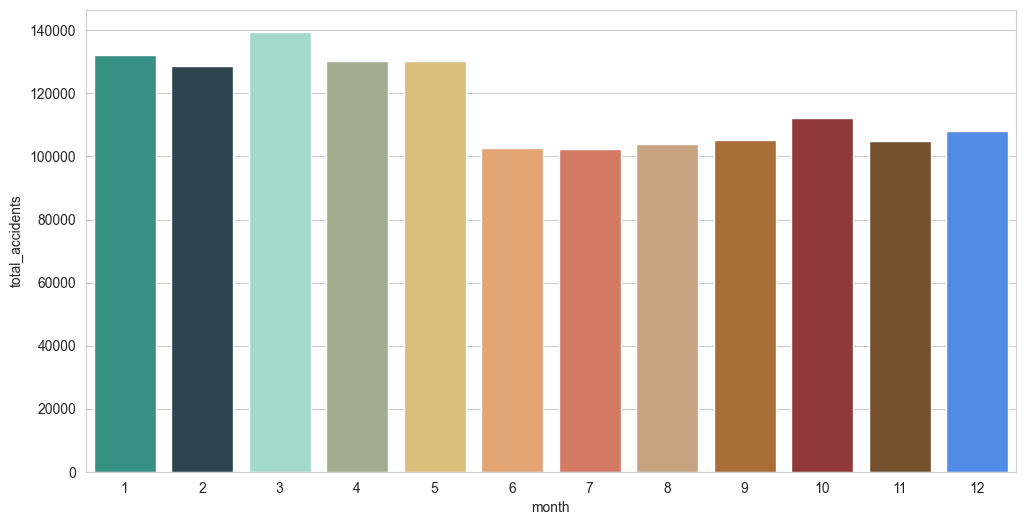

In [50]:
# Рисуем столбчатую диаграмму по месяцам
fig, ax = plt.subplots(figsize=(12, 6))

month_colors = {
    '1': "#2A9D8F",  # Глубокий холодный бирюзовый (зима)
    '2': "#264653",  # Тёмный сине-серый (зима)
    '3': "#99E2D0",  # Светлый бирюзовый (весна) - сохранён
    '4': "#A3B18A",  # Приглушенный оливковый (весна)
    '5': "#E9C46A",  # Мягкий золотистый (весна)
    '6': "#F4A261",  # Тёплый песочный (лето)
    '7': "#E76F51",  # Приглушенный терракотовый (лето)
    '8': "#D4A373",  # Нежный кораллово-бежевый (лето)
    '9': "#BC6C25",  # Тёплый амбровый (осень)
    '10': "#9E2A2B",  # Глубокий винный (осень)
    '11': "#7F4F24",  # Тёмный охра (осень)
    '12': "#3A86FF"  # Яркий ледяной синий (зима)
}

sns.barplot(
    x='month',
    y='total_accidents',
    data=collisions_by_month,
    palette=month_colors,
    ax=ax
)

plt.show()

#### Аналитические задачи

Составим 6 задач и предоставим порядок решения для двух из них.

1. Анализ серьезности повреждений транспортного средства, исходя из состояния дороги в момент ДТП.
2. Количество участников ДТП в зависимости от типа транспортного средства.
3. Количество участников ДТП в зависимости от состояния дороги.
4. Количество ДТП на каждом типе дороги в зависимости от времени суток.
5. Как отличается средняя сумма страховки в зависимости от типа транспортного средства.
6. Как возраст автомобиля влияет на вероятность ДТП.

##### Порядок решения задачи №5

Для того чтобы выяснить, как отличается средняя сумма страховки в зависимости от типа транспортного средства, мы будем использовать таблицы **parties** и **vehicles**.
1. Соединяем таблицы **parties** и **vehicles** по ключам **case_id**. Нам не нужно получать уникальные идентификаторы, так как мы будем использовать только тип транспортного средства и сумму страховки. Плюс ко всему, для каждого участника строки будут дублироваться, со своими значениями.
2. Считаем среднюю сумму страховки.
3. Группируем данные по типу транспортного средства, используя операторы `GROUP BY` или оконную функцию.
4. Сортируем данные по убыванию средней суммы страховки.
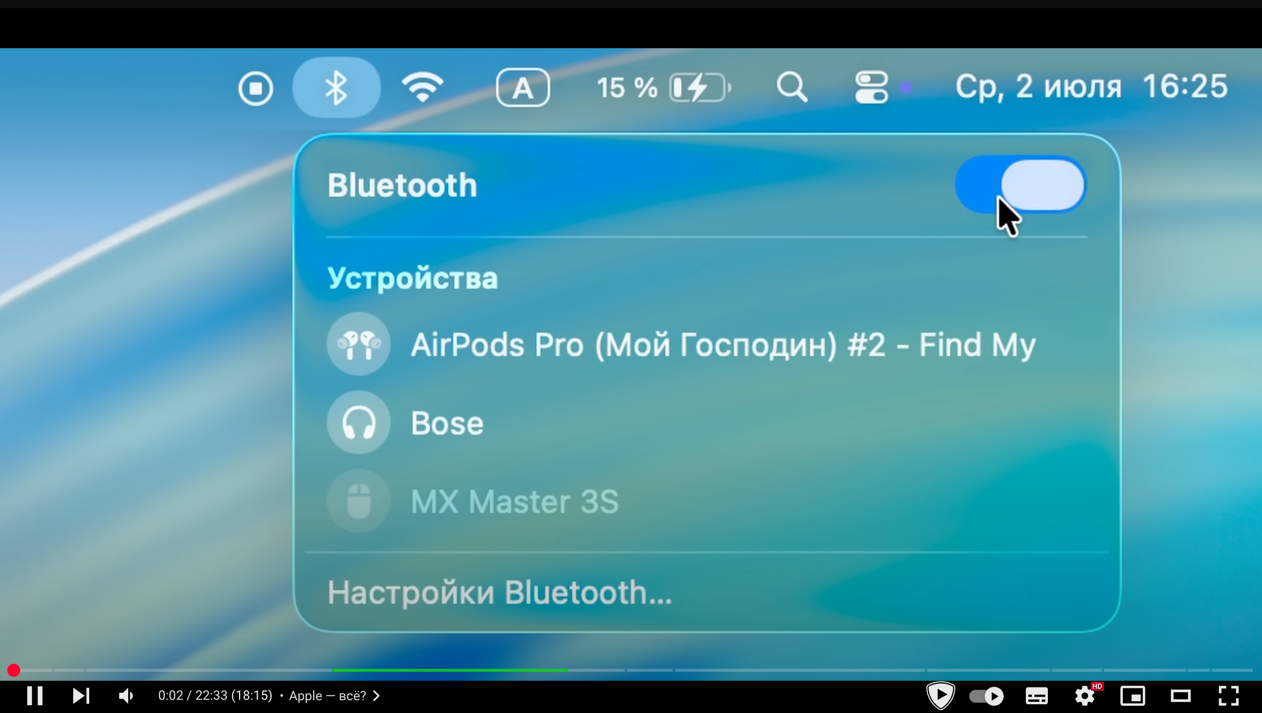

In [51]:
# Выводим среднюю сумму страховки по типу транспортного средства
with open('queries/task_5.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,vehicle_type,avg_insurance_amount
0,coupe,39.7
1,other,39.7
2,hatchback,38.2
3,sedan,37.8
4,minivan,37.0


Тип транспорта не сильно влияет на среднюю сумму страховки.

##### Порядок решения задачи №6
1. Отдельным запросом посмотрим минимальный, средний, и максимальный возраст автомобиля в таблице **vehicles**;
2. Соединим таблицы **collisions** и **vehicles** по **case_id**
3. Определим 3 типа возраста автомобиля:
   - новый (до 3 лет);
   - средний (от 3 до 10 лет);
   - старый (более 10 лет).
4. Сгруппируем данные по типу возраста автомобиля и посчитаем количество ДТП для каждого типа, используя оператор `GROUP BY` или оконную функцию.

In [52]:
# Выводим минимальный, средний и максимальный возраст автомобиля
with open('queries/task_6.1.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,min,avg_vehicle_age,max
0,0,5.137088,161


Мы видим, что минимальный возраст автомобиля составляет 0 лет, а максимальный — 161 год. Скорее всего это какой-то раритетный автомобиль, либо же ошибка в данных. Средний же возраст составляет 5 лет. Новым автомобилем будем считать автомобиль до 4 лет, средним — от 4 до 10 лет, старым — более 10 лет.

In [53]:
# Выводим количество ДТП по типу возраста автомобиля
with open('queries/task_6.2.sql', 'r') as file:
    query = file.read()

pd.read_sql_query(query, engine)

,vehicle_age_group,total_accidents
0,old,689010
1,middle-aged,572933
2,new,366649


Количество старых автомобилей, участвующих в ДТП, составляет почти вдвое больше, чем количество новых автомобилей. Количество дтп у автомобилей среднего возраста чуть ниже, чем у старых.

In [54]:
# Удаляем ненужные данные
del (
    collisions_by_month,
    query
)

### Вывод:

- Все таблицы имеют набор данных.
- Количество таблиц соответствует условию задачи.
- Общий ключ для связи таблиц — это **case_id** в таблице **collisions** и **parties**, а также **case_id** и **party_number** в таблице **vehicles**.

Мы создали 6 аналитических задач, которые помогут глубже понять данные и выявить закономерности в ДТП. Для двух задач мы прописали порядок решения и реализовали его.

## Загрузка данных

Выгрузим всю таблицу за 2012 год, где тип виновника — только машина (car), а ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина). Определим признаки, которые нужно выгрузить.

Среди всех столбцов совершенно точно не понадобятся:
- **id** — уникальный идентификатор записи;
- **case_id** — уникальный идентификатор ДТП;
- **party_number** — уникальный идентификатор участника ДТП;
- **party_type** — тип участника ДТП (в нашем случае это только car);
- **collision_date** — дата ДТП. У нас задача бинарной классификации. Задача не подразумевает временных рядов, поэтому дата не нужна. Плюс ко всему, мы выгрузили данные только за 2012 год;
- **collision_time** — время ДТП. Аналогично пункту выше;
- **collision_damage** — повреждения транспортного средства. Серьезность происшествия не влияет на вероятность ДТП. Это является последствием ДТП;
- **party_count** — количество участников ДТП. Аналогично, это последствия ДТП;
- **type_of_collision** — тип столкновения. Это тоже последствия ДТП;
- **motor_vehicle_involved_with** — транспортное средство, участвующее в ДТП. Это тоже последствия ДТП. Это может быть важным признаком для модели, однако если мы поставим иную задачу: моделирование вероятности дтп от внешних условий. Грубо говоря, если мы моделируем улицу, и хотим узнать, как построить велодорожки/перекрестны/тротуары/пешеходные переходы, чтобы снизить вероятность ДТП, то этот признак будем для нас важен. Но перед нами стоит задача предсказания вероятности ДТП, основываясь на внутренних факторах — то есть водителе;
- **vehicle_type** — тип транспортного средства, скорее всего нет большой разницы между типами автомобилей, которые участвуют в ДТП, будь то купе, или хэтчбек;
- **vehicle_transmission** — тип трансмиссии. Аналогично предыдущему пункту, разница скорее всего минимальна;


Далее нам необходимо провести корреляционный анализ, чтобы понять, какие факторы больше всего влияют на вероятность ДТП. Потенциально для нас имеют значение следующие столбцы:
- **location_type** — тип дороги так же скорее всего не вносит большой вклад в вероятность ДТП;
- **country_city_location** — номер географического района, где произошло ДТП. Для нас это бы имело значение, если бы мы анализировали ДТП только в одном городе. Однако может быть полезно для оценки риска с учетом маршрута;
- **county_location** — название географического района, где произошло ДТП;
- **lighting** — освещение. Этот признак потенциально может быть очень важен для нас, однако у машины есть свои осветительные приборы;
- **control_device** — в описании данных нет информации, какие данные в этом столбце, но это может быть либо устройство управления, либо устройство контроля. В первом случае это неважный фактор, так как это внешний фактор, а во втором же случае это может быть устройство контроля состояния водителя, как например, алкотестер;
- **insurance_premium** — сумма страховки. Это может быть потенциально важным фактором, так как у неопытных водителей страховка может быть выше, а следовательно косвенно поможет модели делать правильное предсказание;
- **cellphone_in_use** — возможности разговаривать по громкой связи. Потенциально важный фактор, так как отвлекает водителя от дороги.
- **distance** — расстояние от главной дороги в метрах. Для модели данный признак скорее всего не будет иметь значения, однако возможно, он поможет строить маршрут, избегая/прокладывая маршрут через главную дорогу;
- **direction** — направление движения. Скорее всего не имеет значения, однако в задаче сказано оценить риск дтп по выбранному маршруту движения;
- **intersection** — произошло ли ДТП на перекрестке. Это внешний фактор, но может быть это поможет строить маршруты, содержащие меньшее количество перекрестков.


Столбцы, которые совершенно точно понадобятся:
- **vehicle_age** — возраст автомобиля. Это важный фактор, так как старые автомобили могут быть менее безопасными, и сложными в управлении чем новые;
- **primary_coll_factor** — основной фактор аварии. Это основной фактор, который привел к ДТП;
- **pcf_violation_category** — категория нарушения, связанная с основным фактором аварии. Это может быть полезно для понимания, какие нарушения чаще всего приводят к ДТП. С одной стороны это может выглядеть как утечка целевого признака, потому нам надо будет посмотреть, насколько высокая корреляция будет с целевым признаком. Потенциально это поможет нам строить маршрут избегая каких-то факторов, указанных в этом столбце;
- **road_surface** — состояние дороги. Покрытие дороги сильно влияет на вероятность дтп в купе с состоянием водителя;
- **road_condition** — дорожное состояние. Наличие ям, сыпучего материала, итд сильно влияет на вероятность ДТП;
- **weather_1** — погодные условия. Погода влияет на видимость и состояние дороги, что может привести к ДТП;
- **party_sobriety** — трезвость водителя. Это важный фактор, так как состояние водителя влияет на вероятность ДТП;
- **party_drug_physical** — трезвость водителя от наркотических веществ. Аналогично пункту выше;
- **at_fault** — виновник ДТП. Это целевой признак, который мы будем предсказывать.

В конечном итоге в наш запрос входят следующие столбцы:
- `vehicle_age`
- `location_type`
- `country_city_location`
- `country_location`
- `distance`
- `direction`
- `intersection`
- `primary_collision_factor`
- `pcf_violation_category`
- `weather_1`
- `road_surface`
- `road_condition_1`
- `lighting`
- `control_device`
- `insurance_premium`
- `party_sobriety`
- `party_drug_physical`
- `cellphone_in_use`
- `at_fault`

In [55]:
# Пишем запрос с условиями
with open('queries/load_df.sql', 'r') as file:
    query = file.read()

# Сохраняем запрос в датафрейм
df = pd.read_sql_query(query, engine)

# Выводим датафрейм
df

,vehicle_age,location_type,county_city_location,county_location,distance,direction,intersection,primary_collision_factor,pcf_violation_category,weather_1,road_surface,road_condition_1,lighting,control_device,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,at_fault
0,3.0,highway,3700,san diego,279.0,north,0.0,vehicle code violation,speeding,cloudy,dry,normal,dusk or dawn,none,31.0,had not been drinking,None,0.0,0
1,3.0,highway,3700,san diego,279.0,north,0.0,vehicle code violation,speeding,cloudy,dry,normal,dusk or dawn,none,23.0,had not been drinking,sleepy/fatigued,0.0,1
2,NaN,None,1922,los angeles,500.0,south,0.0,vehicle code violation,unsafe lane change,clear,dry,normal,dark with street lights,none,NaN,impairment unknown,G,0.0,1
3,11.0,highway,3607,san bernardino,400.0,east,0.0,vehicle code violation,speeding,clear,dry,normal,dark with street lights,none,42.0,had not been drinking,None,0.0,0
4,11.0,highway,3607,san bernardino,400.0,east,0.0,vehicle code violation,speeding,clear,dry,normal,dark with street lights,none,NaN,impairment unknown,G,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226979,NaN,highway,1900,los angeles,200.0,south,0.0,vehicle code violation,speeding,cloudy,dry,normal,daylight,none,27.0,had not been drinking,None,0.0,1
226980,NaN,highway,3008,orange,1056.0,west,0.0,vehicle code violation,unsafe lane change,clear,dry,normal,dark with street lights,none,49.0,had not been drinking,None,0.0,0
226981,NaN,highway,3008,orange,1056.0,west,0.0,vehicle code violation,unsafe lane change,clear,dry,normal,dark with street lights,none,NaN,impairment unknown,G,0.0,1
226982,NaN,None,4315,santa clara,0.0,None,1.0,vehicle code violation,traffic signals and signs,clear,dry,normal,dusk or dawn,functioning,45.0,had not been drinking,None,0.0,0


In [56]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226984 entries, 0 to 226983
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vehicle_age               115046 non-null  float64
 1   location_type             101712 non-null  object 
 2   county_city_location      226984 non-null  object 
 3   county_location           226984 non-null  object 
 4   distance                  226984 non-null  float64
 5   direction                 175734 non-null  object 
 6   intersection              225895 non-null  float64
 7   primary_collision_factor  226197 non-null  object 
 8   pcf_violation_category    222903 non-null  object 
 9   weather_1                 226205 non-null  object 
 10  road_surface              225492 non-null  object 
 11  road_condition_1          225678 non-null  object 
 12  lighting                  226177 non-null  object 
 13  control_device            225905 non-null  o

Не все признаки приведены к нужному типу данных. После обработки пропусков нам надо будет привести некоторые столбцы к целочисленному типу данных. Большинство из них можно будет привести к `int8` для экономии памяти.

### Вывод:

Мы выбрали все данные, которые могут нам понадобиться для обучения модели, и посмотрели, к какому типу данных принадлежат столбцы. После обработки пропусков и данных, приведем все данные к корректному типу данных.

## Предобработка данных

Проведем предобработку данных. Посмотрим на распределения числовых значений, количество пропусков, наличие явных и неявных дубликатов

In [57]:
# Объявим числовые и категориальные столбцы
num_cols = ['vehicle_age', 'distance', 'insurance_premium']
cat_cols = ['control_device',
            'county_city_location',
            'county_location',
            'direction',
            'intersection',
            'lighting',
            'location_type',
            'party_drug_physical',
            'party_sobriety',
            'pcf_violation_category',
            'primary_collision_factor',
            'road_condition_1',
            'road_surface',
            'weather_1',
            'cellphone_in_use',
            'at_fault']

In [58]:
# Посмотрим на общее количество пропусков в числовых столбцах
df[num_cols].isna().sum()

vehicle_age          111938
distance                  0
insurance_premium     20695
dtype: int64

In [59]:
# Посмотрим на общее количество пропусков в категориальных столбцах
df[cat_cols].isna().sum()

control_device                1079
county_city_location             0
county_location                  0
direction                    51250
intersection                  1089
lighting                       807
location_type               125272
party_drug_physical         200553
party_sobriety                4024
pcf_violation_category        4081
primary_collision_factor       787
road_condition_1              1306
road_surface                  1492
weather_1                      779
cellphone_in_use             27693
at_fault                         0
dtype: int64

### Предобработка числовых столбцов

Посмотрим на распределения столбцов, наличие выбросов, обработаем пропуски

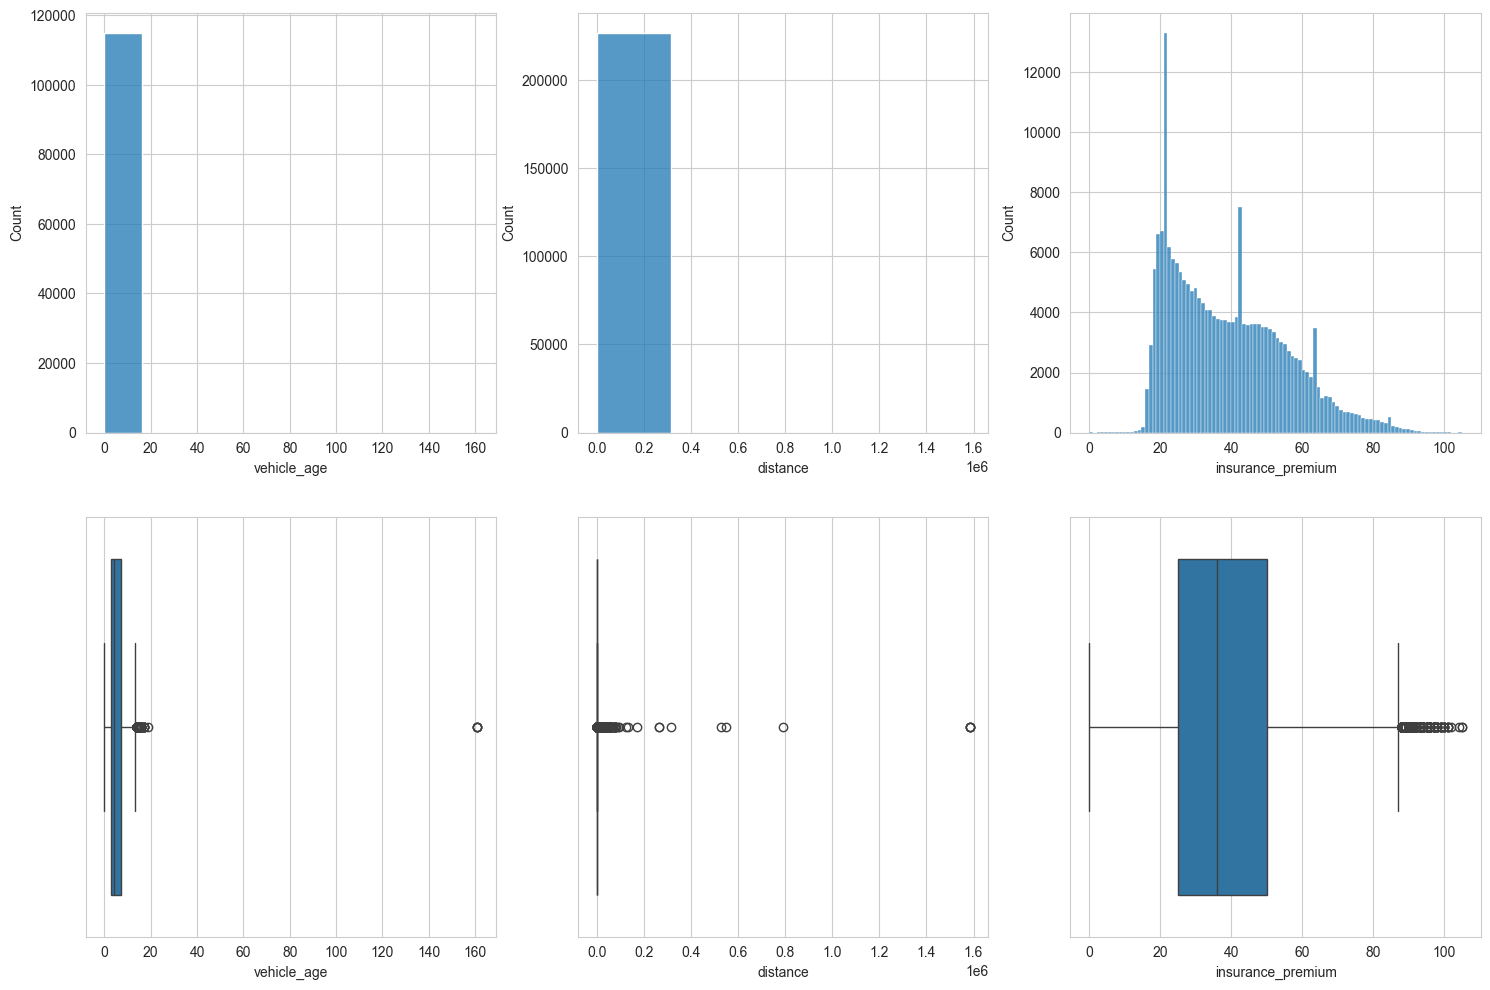

In [60]:
# Рисуем гистограмму и боксплот для числовых столбцов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
bins = [10, 5, 100]

for i, col in enumerate(num_cols):
    # Гистограммы
    sns.histplot(df[col],
                 ax=axes[0, i],
                 bins=bins[i], )
    # Боксплот
    sns.boxplot(df[col],
                ax=axes[1, i],
                orient='h')

plt.show()

Мы видим, что у нас есть по одному аномально большому выбросу в столбцах с возрастом и расстоянием. Остальные выбросы лежат "в пределах нормы". Удалим самый большой выброс, чтобы модели было легче обучаться.

In [61]:
# Смотрим на выброс в возрасте авто
df['vehicle_age'].sort_values(ascending=False)

21539     161.0
21538     161.0
80457     161.0
80458     161.0
130440     19.0
          ...  
226979      NaN
226980      NaN
226981      NaN
226982      NaN
226983      NaN
Name: vehicle_age, Length: 226984, dtype: float64

In [62]:
# Сохраняем индексы выбросов
rows_to_drop = df['vehicle_age'].sort_values(ascending=False).index[:4]

# Удаляем строки по индексу
df = df.drop(index=rows_to_drop, axis=0)

# Проверяем, все ли верно мы удалили
df['vehicle_age'].sort_values(ascending=False)

130440    19.0
166502    17.0
103525    17.0
103524    17.0
102807    17.0
          ... 
226979     NaN
226980     NaN
226981     NaN
226982     NaN
226983     NaN
Name: vehicle_age, Length: 226980, dtype: float64

In [63]:
# Смотрим на выбросы в дистанции
df['distance'].sort_values(ascending=False)

78951     1584000.0
30250     1584000.0
78950     1584000.0
30249     1584000.0
117034     792000.0
            ...    
122117          0.0
122116          0.0
122114          0.0
122113          0.0
226983          0.0
Name: distance, Length: 226980, dtype: float64

In [64]:
# Сохраняем индексы выбросов
rows_to_drop = df['distance'].sort_values(ascending=False).index[:4]

# Удаляем строки по индексу
df = df.drop(index=rows_to_drop, axis=0)

# Проверяем, все ли верно мы удалили
df['distance'].sort_values(ascending=False)

117034    792000.0
178498    549120.0
90231     528000.0
132318    316800.0
45235     264000.0
            ...   
102126         0.0
186593         0.0
186597         0.0
186598         0.0
226983         0.0
Name: distance, Length: 226976, dtype: float64

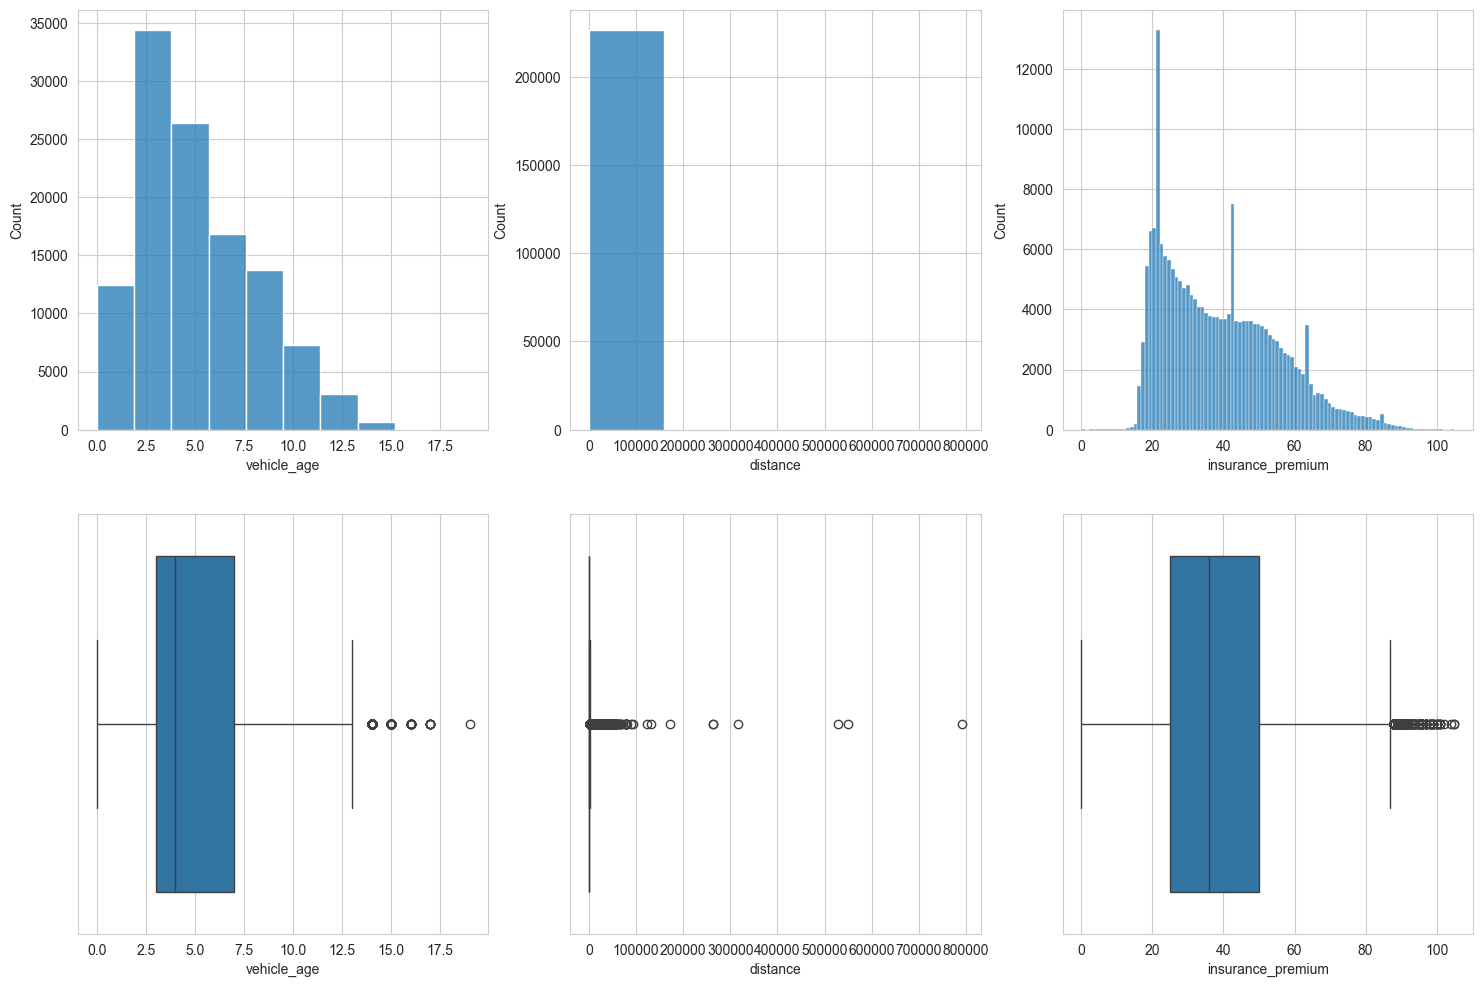

In [65]:
# Рисуем гистограмму и боксплот для числовых столбцов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
bins = [10, 5, 100]

for i, col in enumerate(num_cols):
    # Гистограммы
    sns.histplot(df[col],
                 ax=axes[0, i],
                 bins=bins[i], )
    # Боксплот
    sns.boxplot(df[col],
                ax=axes[1, i],
                orient='h')

plt.show()

### Предобработка категориальных столбцов

Проверим наличие явных и неявных дубликатов

In [66]:
# Посмотрим на уникальных значений в категориальных столбцах
df[cat_cols].nunique()

control_device                4
county_city_location        513
county_location              58
direction                     4
intersection                  2
lighting                      5
location_type                 3
party_drug_physical           5
party_sobriety                6
pcf_violation_category       22
primary_collision_factor      5
road_condition_1              8
road_surface                  4
weather_1                     7
cellphone_in_use              2
at_fault                      2
dtype: int64

Во всех столбцах, кроме `country_city_location` и `country_location` совсем немного уникальных значений. Проверим их на наличие неявных дубликатов

In [67]:
# Выводим уникальные значения в каждом столбце, кроме 'county_city_location', 'country_location'
for col in list(set(cat_cols) - {'county_city_location', 'county_location'}):
    print(col, ':', df[col].unique(), end='\n\n')

weather_1 : ['cloudy' 'clear' 'raining' None 'fog' 'snowing' 'other' 'wind']

party_sobriety : ['had not been drinking' 'impairment unknown' 'not applicable'
 'had been drinking, under influence'
 'had been drinking, not under influence' None
 'had been drinking, impairment unknown']

at_fault : [0 1]

direction : ['north' 'south' 'east' 'west' None]

control_device : ['none' 'functioning' None 'not functioning' 'obscured']

intersection : [ 0.  1. nan]

pcf_violation_category : ['speeding' 'unsafe lane change' 'unknown' 'dui' 'improper turning'
 'unsafe starting or backing' 'following too closely' 'impeding traffic'
 'wrong side of road' None 'other hazardous violation'
 'automobile right of way' 'traffic signals and signs'
 'other than driver (or pedestrian)' 'other improper driving'
 'improper passing' 'other equipment' 'pedestrian right of way'
 'pedestrian violation' 'hazardous parking' 'brakes' 'fell asleep'
 'lights']

road_condition_1 : ['normal' None 'construction' 'flooded' '

Столбцы `intersection` и `location_type` являются сами по себе неявными дубликатами. Столбец `intersection` является булевым и обозначает только то, произошла ли авария на перекрестке. В столбце `location_type` есть значение "intersection". Удалим столбец `intersection`. Предварительно посмотрим, корректно ли заполнены значения.

В столбце `control_device` 'not functioning' обозначает, что средство контроля предусмотрено, просто оно не работает. 'None' — означает, что в транспортном средстве вообще нет средства контроля. Концептуально результат один и тот же, контроль не пройден. Можно объединить эти значения

В столбце `lighting` есть значения 'dark with no street lights' и 'dark with street lights not functioning'. По сути разницы нет, объединим эти значения.

Во всех остальных столбцах неявных дубликатов нет. Большинство пропусков впоследствии мы заполним значением 'unknown', ибо он представлено как "пропуск" в столбцах

In [68]:
# Проверяем, корректно ли заполнены значения
df[['location_type', 'intersection']]

,location_type,intersection
0,highway,0.0
1,highway,0.0
2,None,0.0
3,highway,0.0
4,highway,0.0
...,...,...
226979,highway,0.0
226980,highway,0.0
226981,highway,0.0
226982,None,1.0


In [69]:
# Заполняем значения
df.loc[df['intersection'] == 1, 'location_type'] = 'intersection'

# Проверяем, корректно ли теперь все заполнено
df[['location_type', 'intersection']]

,location_type,intersection
0,highway,0.0
1,highway,0.0
2,None,0.0
3,highway,0.0
4,highway,0.0
...,...,...
226979,highway,0.0
226980,highway,0.0
226981,highway,0.0
226982,intersection,1.0


In [70]:
# Удаляем столбец с перекрестком
df = df.drop('intersection', axis=1)

# Заменяем средство контроля
df['control_device'] = df['control_device'].replace('not functioning', 'none')

# Заменяем освещение
df['lighting'] = df['lighting'].replace('dark with street lights not functioning', 'dark with no street lights')

In [71]:
# Проверяем, корректно ли все привелось
for col in list(set(cat_cols) - {'county_city_location', 'county_location', 'intersection'}):
    print(col, ':', df[col].unique(), end='\n\n')

weather_1 : ['cloudy' 'clear' 'raining' None 'fog' 'snowing' 'other' 'wind']

party_sobriety : ['had not been drinking' 'impairment unknown' 'not applicable'
 'had been drinking, under influence'
 'had been drinking, not under influence' None
 'had been drinking, impairment unknown']

at_fault : [0 1]

direction : ['north' 'south' 'east' 'west' None]

control_device : ['none' 'functioning' None 'obscured']

pcf_violation_category : ['speeding' 'unsafe lane change' 'unknown' 'dui' 'improper turning'
 'unsafe starting or backing' 'following too closely' 'impeding traffic'
 'wrong side of road' None 'other hazardous violation'
 'automobile right of way' 'traffic signals and signs'
 'other than driver (or pedestrian)' 'other improper driving'
 'improper passing' 'other equipment' 'pedestrian right of way'
 'pedestrian violation' 'hazardous parking' 'brakes' 'fell asleep'
 'lights']

road_condition_1 : ['normal' None 'construction' 'flooded' 'loose material' 'reduced width'
 'other' 'obstru

### Обработка пропусков

В большинстве столбцов заменим пропуски на 'unknown', так как они там уже указаны. Поступим аналогично, и заполним пропуски на это значение в следующих столбцах:
- `pcf_violation_category`
- `location_typev`
- `road_surface`
- `cellphone_in_use`
- `weather_1`
- `primary_collision_factor`
- `road_condition_1`
- `party_drug_physical`, здесь это является значением `G - Impairment unknown`. Заменим его и заполним пропуски
- `lighting`
- `direction`

В следующих столбцах заменим пропуски иным образом:
- `control_device` на `none`
- `party_sobriety`, здесь значение `Impairment unknown` отличается от аналогичного пункта. Тут это означает неизвестное ухудшение. Заменим пропуски в этом столбце на значение `not applicable`


Пропуски в числовых столбцах мы заполним медианой

In [72]:
# Заполняем пропуски на unknown
df['pcf_violation_category'] = df['pcf_violation_category'].fillna('unknown')
df['location_type'] = df['location_type'].fillna('unknown')
df['road_surface'] = df['road_surface'].fillna('unknown')
df['cellphone_in_use'] = df['cellphone_in_use'].fillna('unknown')
df['weather_1'] = df['weather_1'].fillna('unknown')
df['primary_collision_factor'] = df['primary_collision_factor'].fillna('unknown')
df['road_condition_1'] = df['road_condition_1'].fillna('unknown')
df['lighting'] = df['lighting'].fillna('unknown')
df['direction'] = df['direction'].fillna('unknown')

# Заполняем и обрабатываем party_drug_physical
df['party_drug_physical'] = df['party_drug_physical'].fillna('unknown')
df['party_drug_physical'] = df['party_drug_physical'].replace('G', 'unknown')

# Заполняем пропуски в оставшихся столбцах
df['control_device'] = df['control_device'].fillna('none')
df['party_sobriety'] = df['party_sobriety'].fillna('not applicable')

# Заполняем пропуски в числовых столбцах
df['vehicle_age'] = df['vehicle_age'].fillna(df['vehicle_age'].median())
df['distance'] = df['distance'].fillna(df['distance'].median())
df['insurance_premium'] = df['insurance_premium'].fillna(df['insurance_premium'].median())

In [73]:
# Проверяем, остались ли пропуски
df.isna().sum()

vehicle_age                 0
location_type               0
county_city_location        0
county_location             0
distance                    0
direction                   0
primary_collision_factor    0
pcf_violation_category      0
weather_1                   0
road_surface                0
road_condition_1            0
lighting                    0
control_device              0
insurance_premium           0
party_sobriety              0
party_drug_physical         0
cellphone_in_use            0
at_fault                    0
dtype: int64

In [74]:
# Преобразуем столбцы к нужному типу данных
df['vehicle_age'] = df['vehicle_age'].astype('int8')
df['distance'] = df['distance'].astype('int64')
df['insurance_premium'] = df['insurance_premium'].astype('int16')
df['at_fault'] = df['at_fault'].astype('int8')

# Проверяем, корректно ли все перевелось
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226976 entries, 0 to 226983
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   vehicle_age               226976 non-null  int8  
 1   location_type             226976 non-null  object
 2   county_city_location      226976 non-null  object
 3   county_location           226976 non-null  object
 4   distance                  226976 non-null  int64 
 5   direction                 226976 non-null  object
 6   primary_collision_factor  226976 non-null  object
 7   pcf_violation_category    226976 non-null  object
 8   weather_1                 226976 non-null  object
 9   road_surface              226976 non-null  object
 10  road_condition_1          226976 non-null  object
 11  lighting                  226976 non-null  object
 12  control_device            226976 non-null  object
 13  insurance_premium         226976 non-null  int16 
 14  party_sob

In [75]:
# Удаляем ненужные переменны
del (
    rows_to_drop
)

### Вывод:

Все данные были приведены к необходимому типу данных. Пропуски в числовых столбцах мы заполнили медианой. Большинство пропусков в категориальных столбцах были заменены на 'unknown'. В следующих столбцах мы заполнили пропуски следующим образом:
- `control_device` заполнили значением `none`
- `party_sobriety` заполнили значением `not applicable`

Во время обработки неявных дубликатов, мы удалили столбец `intesection`, так как он сам по себе являлся неявным дубликатом одного из значений столбца `location_type`.

## Корреляционный анализ

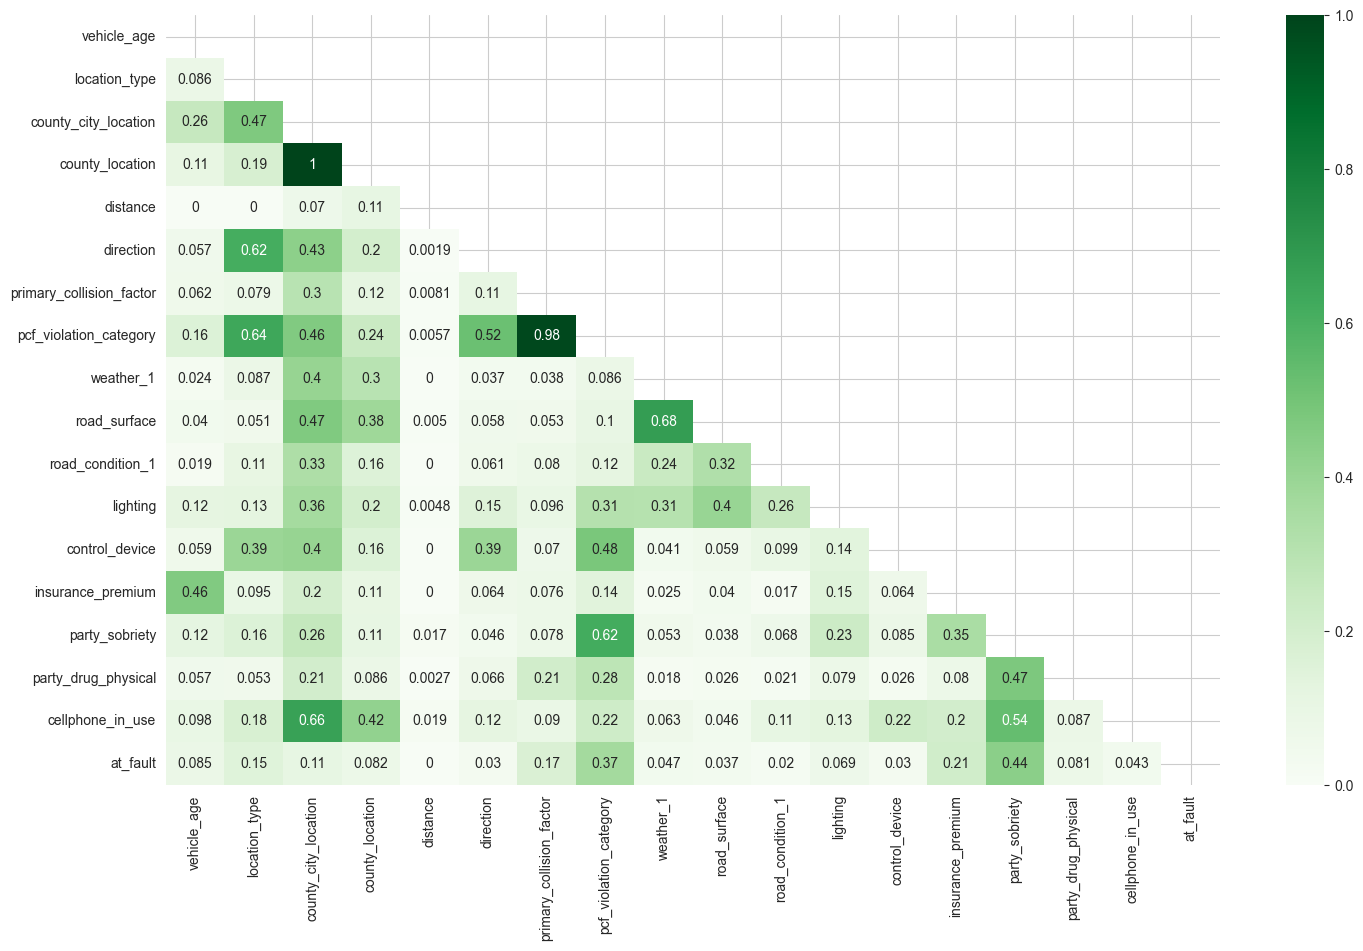

In [76]:
plt.figure(figsize=(17, 10))

# Рисуем матрицу корреляции
sns.heatmap(df.phik_matrix(interval_cols=num_cols),
            annot=True, cmap='Greens',
            mask=np.triu(np.ones_like(
                df.phik_matrix(interval_cols=num_cols),
                dtype=bool)))

plt.show()

### Feature Engineering

Создадим новые признаки:
- `vehicle_age` — заменим возраст на категориальный. До 3-х лет новый автомобиль, от 3-х до 10 — средний, а от 10 лет — старый. Такие цифры были выбраны, основываясь на гистограмме;
- `weather` — разделим погоду на субъективно опасную и безопасную;
- `road_surface` — аналогично пункту выше;
- `road_condition` — аналогично пункту выше;
- `lightning` — разделим данные на день и ночь;
- `control_device` — разделим данные на "есть/нет";
- `party_sobriery_cat` — "sober", если участник трезв, во всех остальных случаях "not sober". Так же стоит отметить, что мы создаем новый столбец, так как оригинальный столбец имеет высокую корреляцию с таргетом. Посмотрим, какой из столбцов будет иметь большую корреляцию;
- `party_drug_phisical` — аналогично пункту выше;

Столбец `county_city_location` имеет сравнительно неплохую корреляцию с целевым признаком, однако там слишком много уникальных значений, и модели нейронной сети будет очень тяжело обучаться на этом. Выделим самые часты значения, а остальные заменим на `other`.

In [77]:
# Смотрим на самые частые значения
df['county_city_location'].value_counts()

county_city_location
1942    27264
1900     8542
3400     4320
3711     4207
4313     3687
        ...  
1009        1
4704        1
1003        1
1958        1
4105        1
Name: count, Length: 513, dtype: int64

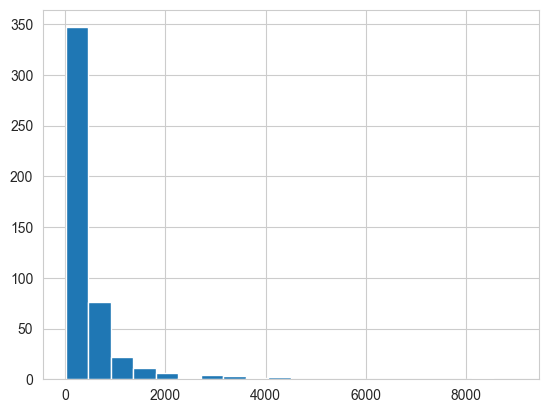

In [78]:
# Выводим гистограмму самых частых значений
plt.hist(df['county_city_location'].value_counts(),
         range=(10, 9000),
         bins=20)

plt.show()

Используем значение 2000 как границу, потому что значения ниже этого встречаются очень часто

In [79]:
# Устанавливаем пороговое значение
threshold = 2000

# Сохраняем значения, соответствующие условию
counts = df['county_city_location'].value_counts()
values = counts[counts > threshold].index.tolist()

# Заменяем все значения, кроме выбранных
df['county_city_location'] = df['county_city_location'].apply(lambda x: x if x in values else 'other')

# Проверяем, все ли корректно привелось
df['county_city_location'].unique()

array(['3700', 'other', '3300', '3600', '3313', '1941', '3711', '1942',
       '1900', '3404', '4313', '3001', '0109', '3400', '1500'],
      dtype=object)

In [80]:
def categorize_age(value: pd.Series.values) -> pd.Series.values:
    """
    Преобразовывает столбец с возрастом автомобиля в категориальный, используя следующие правила:
     - `new`, если возраст автомобиля меньше 3 лет
     - `mid-aged`, если возраст автомобиля от 3 до 10 лет
     - `old`, если возраст автомобиля больше 10 лет
    :param value: столбец с возрастом автомобиля
    :return: категоризованный столбец с возрастом автомобиля
    """
    if value < 3:
        return 'new'
    if value < 10:
        return 'mid-aged'
    else:
        return 'old'


# Категоризируем возраст автомобиля
df['vehicle_age'] = df['vehicle_age'].apply(categorize_age)

In [81]:
# Категоризируем данные согласно плану
# Погода
df['weather_1'] = df['weather_1'].apply(lambda x: 'not-dangerous' if x in ['clear', 'cloudy'] else 'dangerous')

# Дорожное покрытие
df['road_surface'] = df['road_surface'].apply(lambda x: 'not-dangerous' if x == 'dry' else 'dangerous')

# Дорожное покрытие
df['road_condition_1'] = df['road_condition_1'].apply(lambda x: 'not-dangerous' if x == 'normal' else 'dangerous')

# Средство контроля
df['control_device'] = df['control_device'].apply(lambda x: 'yes' if x == 'functioning' else 'no')

# Трезвость участника
df['party_sobriety_cat'] = df['party_sobriety'].apply(lambda x: 'sober' if x in ['had not been drinking',
                                                                                 'not applicable',
                                                                                 'had been drinking, not under influence'] else 'not-sober')

# Трезвость участника
df['party_drug_physical'] = df['party_drug_physical'].apply(
    lambda x: 'not-sober' if x == 'under drug influence' else 'sober')

# Выводим финальный датафрейм
df

,vehicle_age,location_type,county_city_location,county_location,distance,direction,primary_collision_factor,pcf_violation_category,weather_1,road_surface,road_condition_1,lighting,control_device,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,at_fault,party_sobriety_cat
0,mid-aged,highway,3700,san diego,279,north,vehicle code violation,speeding,not-dangerous,not-dangerous,not-dangerous,dusk or dawn,no,31,had not been drinking,sober,0.0,0,sober
1,mid-aged,highway,3700,san diego,279,north,vehicle code violation,speeding,not-dangerous,not-dangerous,not-dangerous,dusk or dawn,no,23,had not been drinking,sober,0.0,1,sober
2,mid-aged,unknown,other,los angeles,500,south,vehicle code violation,unsafe lane change,not-dangerous,not-dangerous,not-dangerous,dark with street lights,no,36,impairment unknown,sober,0.0,1,not-sober
3,old,highway,other,san bernardino,400,east,vehicle code violation,speeding,not-dangerous,not-dangerous,not-dangerous,dark with street lights,no,42,had not been drinking,sober,0.0,0,sober
4,old,highway,other,san bernardino,400,east,vehicle code violation,speeding,not-dangerous,not-dangerous,not-dangerous,dark with street lights,no,36,impairment unknown,sober,0.0,1,not-sober
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226979,mid-aged,highway,1900,los angeles,200,south,vehicle code violation,speeding,not-dangerous,not-dangerous,not-dangerous,daylight,no,27,had not been drinking,sober,0.0,1,sober
226980,mid-aged,highway,other,orange,1056,west,vehicle code violation,unsafe lane change,not-dangerous,not-dangerous,not-dangerous,dark with street lights,no,49,had not been drinking,sober,0.0,0,sober
226981,mid-aged,highway,other,orange,1056,west,vehicle code violation,unsafe lane change,not-dangerous,not-dangerous,not-dangerous,dark with street lights,no,36,impairment unknown,sober,0.0,1,not-sober
226982,mid-aged,intersection,other,santa clara,0,unknown,vehicle code violation,traffic signals and signs,not-dangerous,not-dangerous,not-dangerous,dusk or dawn,yes,45,had not been drinking,sober,0.0,0,sober


/Users/moncervers/PycharmProjects/car_accident_prediction/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/moncervers/PycharmProjects/car_accident_prediction/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


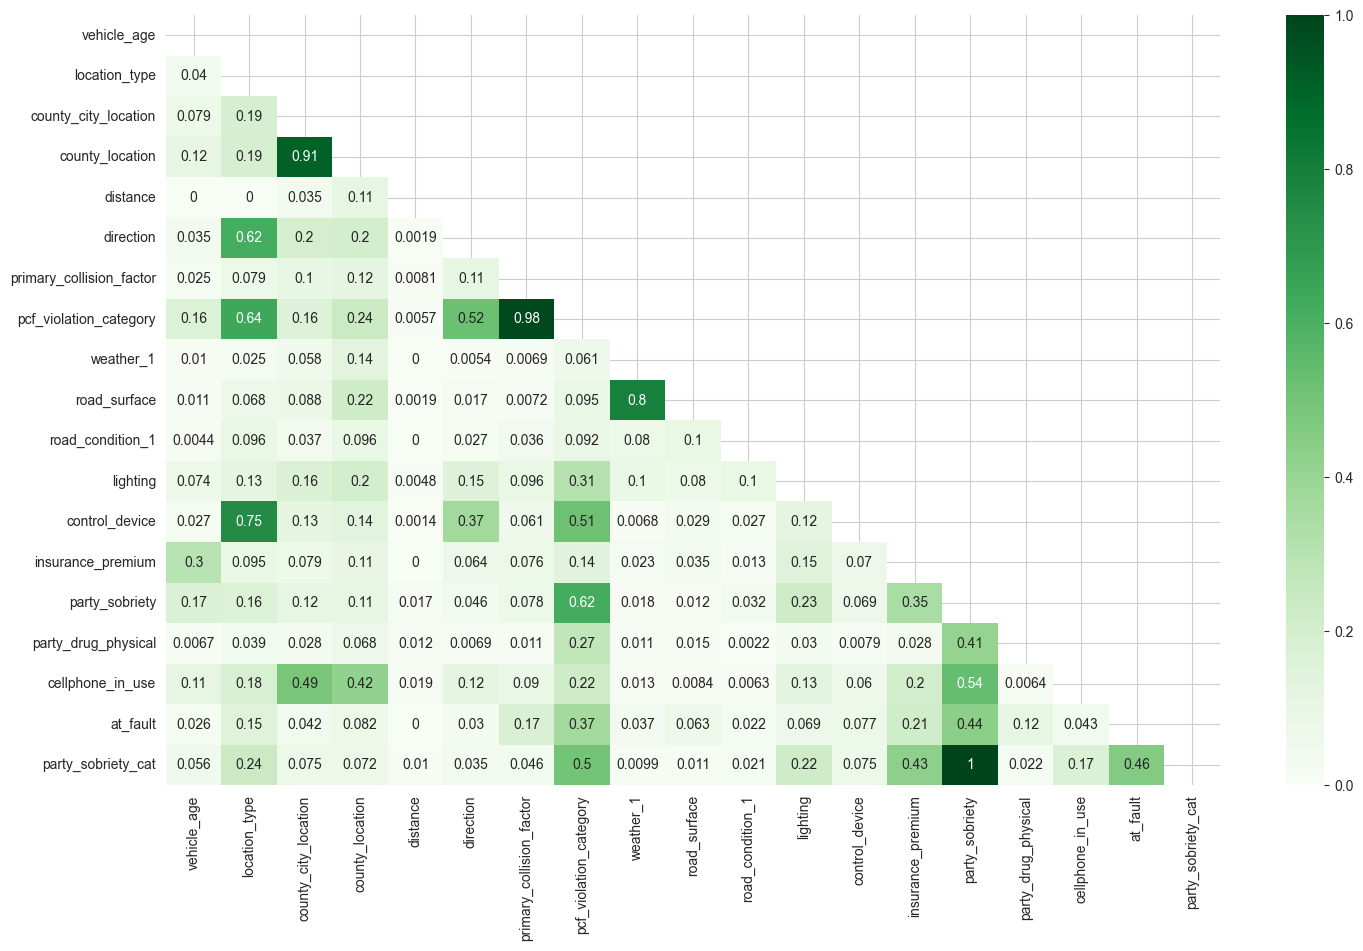

In [82]:
plt.figure(figsize=(17, 10))

num_cols = ['distance', 'insurance_premium']

# Рисуем матрицу корреляции
sns.heatmap(df.phik_matrix(interval_cols=num_cols),
            annot=True, cmap='Greens',
            mask=np.triu(np.ones_like(
                df.phik_matrix(interval_cols=num_cols),
                dtype=bool)))

plt.show()

Среди всех наших искусственно сгенерированных признаков чуть лучше оригинальных себя показали только `party_drug_physical` и `party_sobriety_cat`. Оставим только столбцы, у которых корреляция с таргетом не ниже 0.15

In [83]:
# Объявляем список столбцов, которые мы удалим
cols_to_drop = ['vehicle_age', 'county_location', 'distance', 'direction', 'weather_1', 'road_surface',
                'road_condition_1', 'lighting', 'control_device', 'party_sobriety', 'cellphone_in_use',
                'county_city_location', 'party_drug_physical']

In [84]:
# Удаляем столбцы с низкой корреляцией
df = df.drop(cols_to_drop, axis=1)

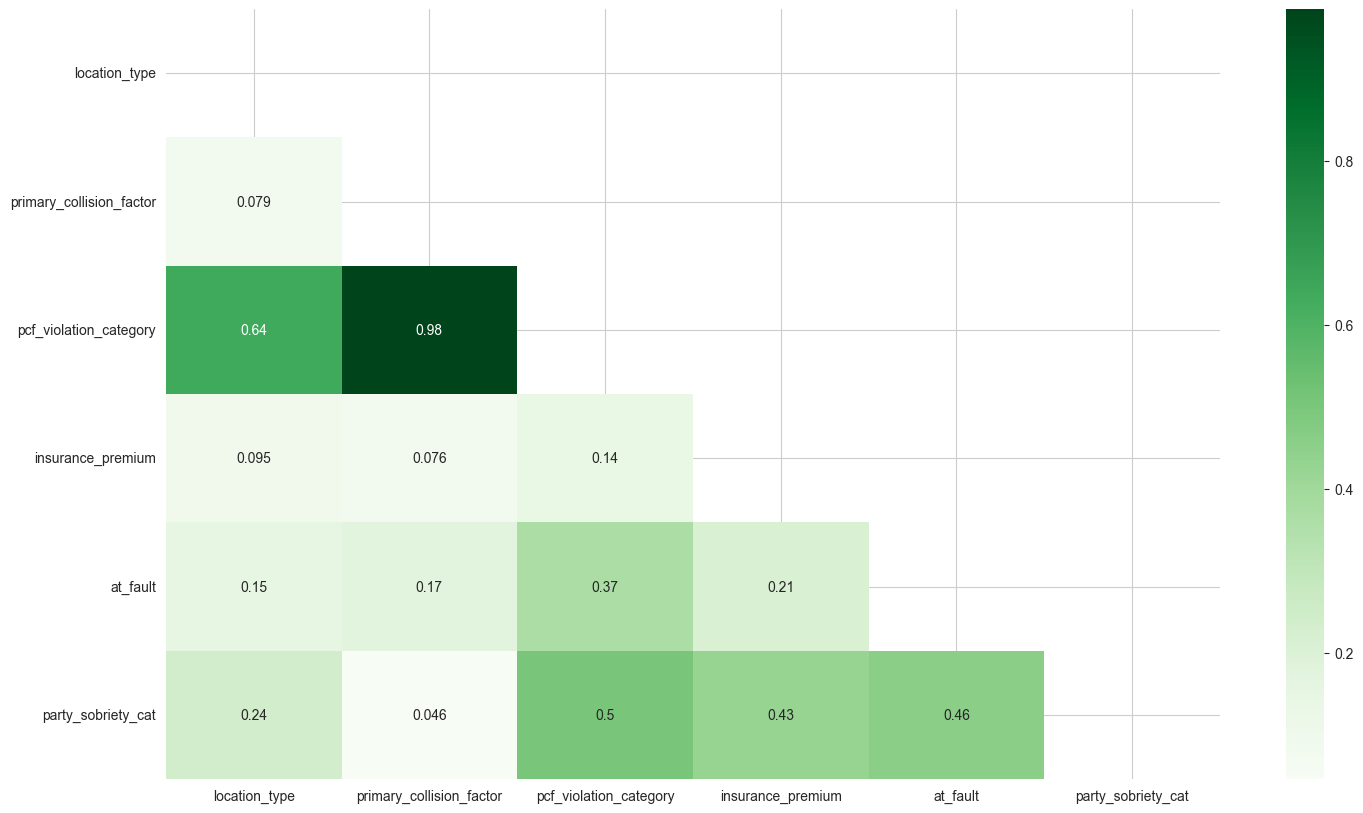

In [85]:
plt.figure(figsize=(17, 10))

# Рисуем матрицу корреляции
sns.heatmap(df.phik_matrix(interval_cols=num_cols),
            annot=True, cmap='Greens',
            mask=np.triu(np.ones_like(
                df.phik_matrix(interval_cols=num_cols),
                dtype=bool)))

plt.show()

In [86]:
# Проверяем, есть ли у нас явные дубликаты
df.duplicated().sum()

np.int64(217057)

In [87]:
# Удаляем явные дубликаты
df = df.drop_duplicates()

# Проверяем, все ли мы удалили
df.duplicated().sum()

np.int64(0)

### Вывод:

Мы провели корреляционный анализ и оставили только столбцы, корреляция с которыми у таргета больше 0.1. Мы так же создали несколько искусственных признаков, но только пара из них чуть-чуть повысили корреляцию с целевым признаком.

После обработки данных и создания новых искуственных признаков почти половину датафрейма составляли явные дубликаты. Для облегчения модели, мы удалили их

## Создание моделей для оценки водительского риска

1. Подготовим набор данных на основе первичного предположения заказчика.
2. Проведем первичный отбор факторов, необходимых для модели. Изучим описание факторов. Отберем те, которые могут влиять на вероятность ДТП.
3. Проведем статистическое исследование отобранных факторов.
    - По результату исследовательского анализа внесем корректировки, если они нужны.
    - Категоризируем исходные данные, проведем масштабирование.
    - Подготовим обучающую и тестовую выборки.

### Подготовка данных

In [88]:
# Переопределяем числовые и категориальные столбцы
num_cols = ['insurance_premium']
cat_cols = ['location_type',
            'primary_collision_factor', 'pcf_violation_category',
            'party_sobriety_cat',
            ]

# Проверяем, ну упустили ли мы что-то
print(set(df.columns) - set(cat_cols + num_cols))

{'at_fault'}


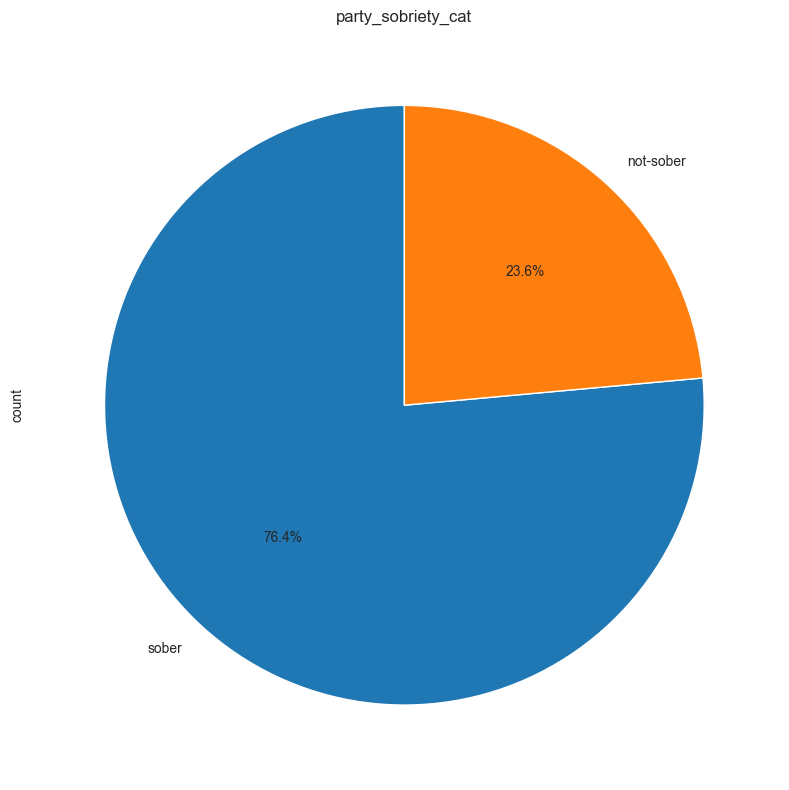

In [89]:
# Посмотрим, есть ли дисбаланс классов в бинарных столбцах
fig, axes = plt.subplots(figsize=(12, 8))

df['party_sobriety_cat'].value_counts().plot.pie(
    ax=axes,  # Указываем ось для построения
    title='party_sobriety_cat',  # Заголовок графика — название столбца
    autopct='%1.1f%%',  # Отображение доли в процентах
    startangle=90  # Поворот диаграммы на 90 градусов для лучшей читаемости
)

# Улучшаем расположение графиков, чтобы они не перекрывались
plt.tight_layout()
# Отображаем график
plt.show()

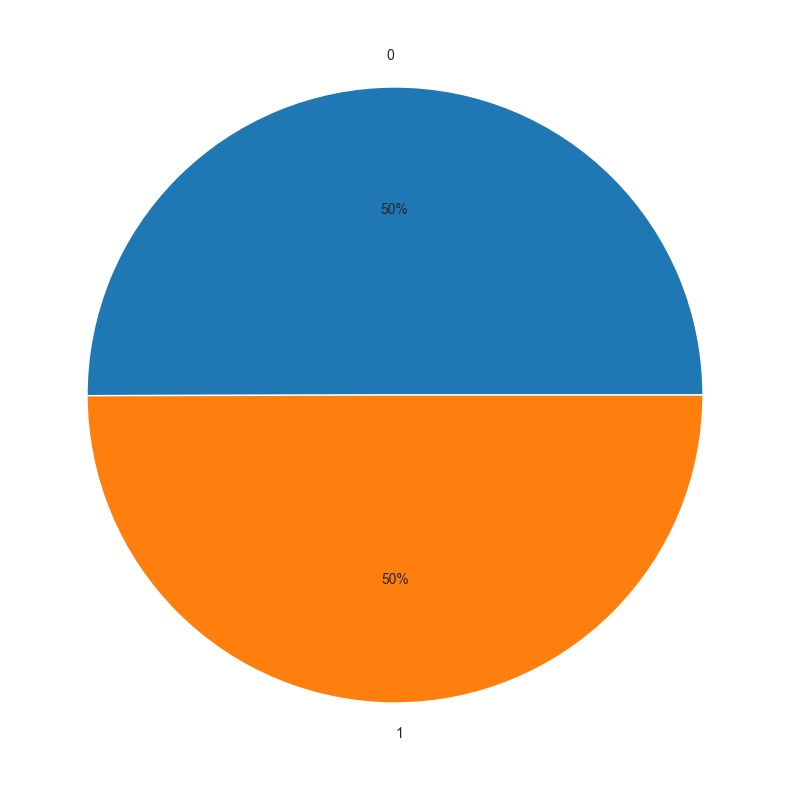

In [90]:
# Посмотрим на то, есть ли у нас дисбаланс классов в целевом признаке
plt.figure(figsize=(17, 10))
plt.pie(x=df['at_fault'].value_counts(),
        labels=df['at_fault'].value_counts().index,
        autopct='%1.0f%%', )

plt.show()

In [91]:
# Приводим категориальные данные к типу 'category'
for col in cat_cols:
    df[col] = df[col].astype('category')

In [92]:
# Разделим данные на тренировочную и тестовые выборки
X = df.drop('at_fault', axis=1).copy()
y = df['at_fault'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=RANDOM_STATE,
                                                    stratify=X['party_sobriety_cat'])

In [93]:
# Выводим размерности всех выборок
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print()
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7439, 5)
y_train: (7439,)

X_test: (2480, 5)
y_test: (2480,)


In [94]:
# Создаем датафрейм с предсказаниями
predictions_df = pd.DataFrame({
    'actual': y_test
})

# Проверяем корректность датафрейма
predictions_df

,actual
153500,0
85229,0
98464,1
27341,1
26145,0
...,...
10227,0
13292,1
76039,0
6429,1


### Создание пайплайна

Создадим пайплайн для кодирования данных и обучения модели.

In [95]:
# Пайплайн для числовых значений
num_pipeline = Pipeline(
    [
        (
            'imputer_before_scaler',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
        ),
        (
            'num',
            StandardScaler()
        ),
    ]
)

# Пайплайн для категориальных значений
cat_pipeline = Pipeline(
    [
        (
            'imputer_before_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
        ),
        (
            'ohe',
            OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
        )
    ]
)

In [96]:
# Создаем препроцессор данных
data_preprocessor = ColumnTransformer(
    [
        ('num_preprocessor', num_pipeline, num_cols),
        ('cat_preprocessor', cat_pipeline, cat_cols),
    ],
    remainder='passthrough',
)

In [97]:
# Создаем финальный пайплайн
final_pipeline = Pipeline(
    [
        ('data_preprocessor', data_preprocessor),
        ('select_k_best', SelectKBest(score_func=f_classif, k=X_train.shape[1] + 1)),
        ('model', DummyClassifier(strategy='most_frequent')),
    ]
)

### Обучение моделей

Создадим и обучим несколько моделей:
- Baseline-модели: используем `DummyClassifier`, `LogisticRegression`, `KNeighborsClassifier`, `SVC`
- Boosting-модель: используем только `CatBoost`, так как все бустинг-модели примерно одинаковы по результатам. CatBoost мы будем использовать из-за удобства передачи категориальных данных
- Нейронная сеть: создадим нейронную сеть, используя pytorch

Для подбора гиперпараметров бустинг и нейросетевой моделей будем использовать `Optuna`. Для бейзлайн моделей будем использовать `RandomizedSearchCV`

#### Baseline-модели

In [98]:
# Сетка гиперпараметров для бейзлай-моделей
baseline_param_grid = [
    # DummyClassifier
    {
        'model': [DummyClassifier(strategy='most_frequent')],
        # Нет гиперпараметров у DummyClassifier, но можно менять препроцессоры и SelectKBest
        'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'select_k_best__k': range(2, X_train.shape[1] + 1),
    },

    # LogisticRegression
    {
        'model': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'model__C': range(1, 20),
        'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'select_k_best__k': range(2, X_train.shape[1] + 1),
    },

    # KNeighborsClassifier
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(1, 20),
        'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'select_k_best__k': range(2, X_train.shape[1] + 1),
    },

    # SVC
    {
        'model': [SVC(random_state=RANDOM_STATE, probability=True, class_weight='balanced')],
        'model__C': range(1, 20),
        'model__kernel': ['rbf', 'poly', 'sigmoid'],
        'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'select_k_best__k': range(2, X_train.shape[1] + 1),
    },
]

In [99]:
baseline_rs = RandomizedSearchCV(
    estimator=final_pipeline,
    param_distributions=baseline_param_grid,
    n_iter=15,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=3
)

In [100]:
%%time

# Обучаем модель
baseline_rs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pyp

[CV 5/5] END data_preprocessor__num_preprocessor__num=passthrough, model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=13, model__kernel=poly, select_k_best__k=5;, score=0.597 total time=   1.4s
[CV 1/5] END data_preprocessor__num_preprocessor__num=passthrough, model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=13, model__kernel=poly, select_k_best__k=5;, score=0.591 total time=   1.6s
[CV 3/5] END data_preprocessor__num_preprocessor__num=passthrough, model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=13, model__kernel=poly, select_k_best__k=5;, score=0.592 total time=   1.6s
[CV 4/5] END data_preprocessor__num_preprocessor__num=passthrough, model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=13, model__kernel=poly, select_k_best__k=5;, score=0.557 total time=   1.6s
[CV 2/5] END data_preprocessor__num_preprocessor__num=passthrough, model=SVC(class_weight='balanced', probab

/Users/moncervers/PycharmProjects/car_accident_prediction/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END data_preprocessor__num_preprocessor__num=MinMaxScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=1, model__kernel=sigmoid, select_k_best__k=2;, score=0.580 total time=   1.8s
[CV 4/5] END data_preprocessor__num_preprocessor__num=MinMaxScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=1, model__kernel=sigmoid, select_k_best__k=2;, score=0.574 total time=   1.9s
[CV 2/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=4, model__kernel=sigmoid, select_k_best__k=4;, score=0.570 total time=   2.0s
[CV 1/5] END data_preprocessor__num_preprocessor__num=MinMaxScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=1, model__kernel=sigmoid, select_k_best__k=2;, score=0.565 total time=   1.9s
[CV 4/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_we

/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pyp

[CV 2/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=18, model__kernel=sigmoid, select_k_best__k=4;, score=0.570 total time=   1.6s


/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pyp

[CV 5/5] END data_preprocessor__num_preprocessor__num=MinMaxScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=1, model__kernel=sigmoid, select_k_best__k=2;, score=0.574 total time=   1.6s
[CV 1/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=18, model__kernel=sigmoid, select_k_best__k=4;, score=0.566 total time=   1.8s


/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[CV 3/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=18, model__kernel=sigmoid, select_k_best__k=4;, score=0.581 total time=   1.8s


/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[CV 4/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=18, model__kernel=sigmoid, select_k_best__k=4;, score=0.568 total time=   1.9s


/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[CV 4/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=5, model__kernel=rbf, select_k_best__k=4;, score=0.575 total time=   2.1s
[CV 5/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=18, model__kernel=sigmoid, select_k_best__k=4;, score=0.575 total time=   1.9s


/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/moncervers/.local/share/uv/python/cpython-3.12.10-macos-aarch64-none/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


[CV 1/5] END data_preprocessor__num_preprocessor__num=RobustScaler(), model=SVC(class_weight='balanced', probability=True, random_state=42), model__C=5, model__kernel=rbf, select_k_best__k=4;, score=0.566 total time=   2.2s
[CV 1/5] END data_preprocessor__num_preprocessor__num=MinMaxScaler(), model=LogisticRegression(penalty='l1', random_state=42, solver='liblinear'), model__C=8, select_k_best__k=3;, score=0.566 total time=   0.0s
[CV 2/5] END data_preprocessor__num_preprocessor__num=MinMaxScaler(), model=LogisticRegression(penalty='l1', random_state=42, solver='liblinear'), model__C=8, select_k_best__k=3;, score=0.572 total time=   0.0s
[CV 3/5] END data_preprocessor__num_preprocessor__num=MinMaxScaler(), model=LogisticRegression(penalty='l1', random_state=42, solver='liblinear'), model__C=8, select_k_best__k=3;, score=0.581 total time=   0.0s
[CV 4/5] END data_preprocessor__num_preprocessor__num=MinMaxScaler(), model=LogisticRegression(penalty='l1', random_state=42, solver='liblinear

,estimator,Pipeline(step..._frequent'))])
,param_distributions,"[{'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), ...], 'model': [DummyClassifi...ost_frequent')], 'select_k_best__k': range(2, 6)}, {'data_preprocessor__num_preprocessor__num': [StandardScaler(), MinMaxScaler(), ...], 'model': [LogisticRegre...r='liblinear')], 'model__C': range(1, 20), 'select_k_best__k': range(2, 6)}, ...]"
,n_iter,15
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [101]:
%%time

# Выводим метрику на тестовых данных
baseline_rs.score(X_test, y_test)

CPU times: user 5.01 ms, sys: 2.91 ms, total: 7.92 ms
Wall time: 7.47 ms


0.635155381897007

In [102]:
# Сохраняем предсказание
predictions_df['baseline_proba'] = baseline_rs.predict_proba(X_test)[:, 1]
predictions_df['baseline_pred'] = baseline_rs.predict(X_test)

# Проверяем
predictions_df

,actual,baseline_proba,baseline_pred
153500,0,0.498978,0
85229,0,0.000136,0
98464,1,0.498978,0
27341,1,0.682115,1
26145,0,0.498978,0
...,...,...,...
10227,0,0.498978,0
13292,1,0.498978,0
76039,0,0.000293,0
6429,1,0.498978,0


### CatBoost

In [112]:
# Сетка гиперпараметров для CatBoost
catboost_param_grid = {
    'iterations': IntDistribution(100, 1000),
    'learning_rate': FloatDistribution(1e-4, 0.3, log=True),
    'depth': IntDistribution(4, 10),
    'l2_leaf_reg': FloatDistribution(1e-3, 10, log=True),
    'border_count': IntDistribution(32, 255),
    'random_strength': FloatDistribution(1e-3, 10, log=True),
    'bagging_temperature': FloatDistribution(0.0, 1.0),
    'use_best_model': CategoricalDistribution([True]),
    'early_stopping_rounds': IntDistribution(10, 50),
    'scale_pos_weight': FloatDistribution(1.0, 5.0),
}

In [113]:
# Поиск гиперпараметров
catboost_optuna = OptunaSearchCV(
    estimator=CatBoostClassifier(
        random_state=RANDOM_STATE,
        cat_features=cat_cols,
        verbose=False,
        thread_count=-1
    ),
    param_distributions=catboost_param_grid,
    n_trials=50,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

/var/folders/d5/3r484lmx4rx7jdlt6zl0_bkc0000gn/T/ipykernel_37308/4207789904.py:2: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  catboost_optuna = OptunaSearchCV(


In [114]:
%%time

# Обучаем модель
catboost_optuna.fit(X_train, y_train, )

[I 2025-07-12 12:00:20,397] A new study created in memory with name: no-name-940cbf25-8005-4beb-b160-28d1bfc58d9d
/Users/moncervers/PycharmProjects/car_accident_prediction/.venv/lib/python3.12/site-packages/optuna_integration/sklearn/sklearn.py:394: RuntimeWarning: Mean of empty slice
  trial.set_user_attr("mean_{}".format(name), np.nanmean(array))
/Users/moncervers/PycharmProjects/car_accident_prediction/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
[W 2025-07-12 12:00:20,467] Trial 0 failed with parameters: {'iterations': 969, 'learning_rate': 0.015473009903420487, 'depth': 9, 'l2_leaf_reg': 0.04521109910378334, 'border_count': 109, 'random_strength': 0.17670747595199612, 'bagging_temperature': 0.1765815912403671, 'use_best_model': True, 'early_stopping_rounds': 42, 'scale_pos_weight': 2.331572984534239} because of the following error: The value 

CPU times: user 16.6 s, sys: 8.15 s, total: 24.8 s
Wall time: 3.32 s


,estimator,<catboost.cor...t 0x306bfdc70>
,param_distributions,"{'bagging_temperature': FloatDistribu....0, step=None), 'border_count': IntDistributi...ow=32, step=1), 'depth': IntDistributi...low=4, step=1), 'early_stopping_rounds': IntDistributi...ow=10, step=1), ...}"
,cv,5
,enable_pruning,False
,error_score,nan
,max_iter,1000
,n_jobs,-1
,n_trials,50
,random_state,None
,refit,True
,return_train_score,False


In [115]:
# Выводим метрику на тестовых данных
catboost_optuna.score(X_test, y_test)

0.6681369525787254

In [107]:
# Сохраняем предсказание
predictions_df['catboost_proba'] = catboost_optuna.predict_proba(X_test)[:, 1]
predictions_df['catboost_pred'] = catboost_optuna.predict(X_test)

# Проверяем
predictions_df

,actual,baseline_proba,baseline_pred,catboost_proba,catboost_pred
153500,0,0.498978,0,0.538671,1
85229,0,0.000136,0,0.000791,0
98464,1,0.498978,0,0.602057,1
27341,1,0.682115,1,0.742113,1
26145,0,0.498978,0,0.478419,0
...,...,...,...,...,...
10227,0,0.498978,0,0.612488,1
13292,1,0.498978,0,0.536583,1
76039,0,0.000293,0,0.001563,0
6429,1,0.498978,0,0.487121,0


### Нейронная сеть

Для начала необходимо создать Архитектуру сети:
- Количество входных слоев: X_train_tensor.shape[1]
- Количество скрытых слоев: используем подбор гиперпараметров
- Функция активации выходного слоя: `Softmax()`
- Количество выходных слоев: 1 (вероятность принадлежности к классу 1)

In [ ]:
# Кодируем данные
X_train_tensor = data_preprocessor.fit_transform(X_train)
X_test_tensor = data_preprocessor.transform(X_test)

# Переводим входные признаки в тензоры
X_train_tensor = torch.tensor(X_train_tensor, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_tensor, dtype=torch.float32)

# Переводим таргет в тензор
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
# Проверяем размерности
print('X_train:', X_train_tensor.shape)
print('y_train:', y_train_tensor.shape)
print()
print('X_test:', X_test_tensor.shape)
print('y_test:', y_test_tensor.shape)

In [ ]:
DEFAULT_DEVICE

In [ ]:
# Функция для создания модели с гиперпараметрами
def create_model(trial, input_size):
    layers = []
    n_layers = trial.suggest_int("n_layers", 1, 16)  # Количество скрытых слоев

    in_features = input_size
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 30)  # Количество нейронов
        layers.append(nn.Linear(in_features, out_features))

        # BatchNorm
        if trial.suggest_categorical(f"use_batchnorm_l{i}", [True, False]):
            layers.append(nn.BatchNorm1d(out_features))

        # Активация
        activation = trial.suggest_categorical(f"activation_l{i}", ['ReLU', 'ELU'])
        layers.append(getattr(nn, activation)())

        # Dropout
        dropout = trial.suggest_float(f"dropout_l{i}", 0, 0.9)
        if dropout > 0:
            layers.append(nn.Dropout(dropout))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))  # Выходной слой для двух классов
    layers.append(nn.Softmax(dim=1))  # Softmax на выходе
    return nn.Sequential(*layers)

In [ ]:
# Объектная функция для Optuna
def objective(trial):
    # Гиперпараметры для подбора
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
    n_epochs = trial.suggest_int("n_epochs", 50, 200)
    input_size = X_train_tensor.shape[1]

    # Преобразуем целевые переменные в one-hot
    # y_train_tensor_onehot = torch.nn.functional.one_hot(y_train_tensor.long().squeeze(), num_classes=2).float()
    # y_test_tensor_onehot = torch.nn.functional.one_hot(y_test_tensor.long().squeeze(), num_classes=2).float()

    # Создаем модель
    model = create_model(trial, input_size).to(DEFAULT_DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCELoss()  # Используем BCELoss для бинарной классификации с one-hot

    # Обучение
    for epoch in range(n_epochs):
        model.train()
        indices = torch.randperm(len(X_train_tensor))
        for i in range(0, len(X_train_tensor), batch_size):
            batch_indices = indices[i:i + batch_size]
            X_batch = X_train_tensor[batch_indices].to(DEFAULT_DEVICE)
            y_batch = y_train_tensor[batch_indices].to(DEFAULT_DEVICE)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Валидация
        if epoch % 10 == 0:
            model.eval()
            with torch.no_grad():
                outputs = model(X_test_tensor.to(DEFAULT_DEVICE))
                probs = outputs[:, 1].cpu().numpy()  # Вероятности положительного класса
                true_labels = y_test_tensor[:, 1].cpu().numpy().astype(int)
                roc_auc = roc_auc_score(true_labels, probs)
                trial.report(roc_auc, epoch)
                if trial.should_prune():
                    raise optuna.exceptions.TrialPruned()

    # Итоговая метрика
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor.to(DEFAULT_DEVICE))
        probs = outputs[:, 1].cpu().numpy()
        true_labels = y_test_tensor[:, 1].cpu().numpy().astype(int)
        roc_auc = roc_auc_score(true_labels, probs)

    # Выводим ROC AUC для текущей пробы
    print(f"Trial {trial.number}: ROC AUC = {roc_auc:.4f}")
    return roc_auc


# Запускаем подбор гиперпараметров
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Выводим лучшие параметры и итоговый ROC AUC
print("\nЛучшие параметры:", study.best_params)
print("Лучший ROC AUC:", study.best_value)

### Сравнение моделей

### Вывод:

## Анализ важности факторов ДТП

#### Вывод:

## Общий вывод: